In [61]:
import sklearn
import torch
import matplotlib.pyplot as plt
import pandas as pd
torch.__version__

'2.2.1+cu121'

In [62]:
!nvidia-smi

/bin/bash: line 1: nvidia-smi: command not found


In [63]:
from sklearn.datasets import make_circles

##making 1000 samples
n_samples=1000

##create circles
x,y=make_circles(n_samples,noise=0.03,random_state=42)

len(x),len(y)

(1000, 1000)

In [64]:
##printing first 5 elements of x and y

print("First five elements of x are : \n",x[:5])
print("First five elements of y are : \n",y[:5])

First five elements of x are : 
 [[ 0.75424625  0.23148074]
 [-0.75615888  0.15325888]
 [-0.81539193  0.17328203]
 [-0.39373073  0.69288277]
 [ 0.44220765 -0.89672343]]
First five elements of y are : 
 [1 1 1 1 0]


In [65]:
##converting x and y into dataframe
df=pd.DataFrame({"x1":x[:,0],"x2":x[:,1],"label":y})
df.head()

,x1,x2,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0


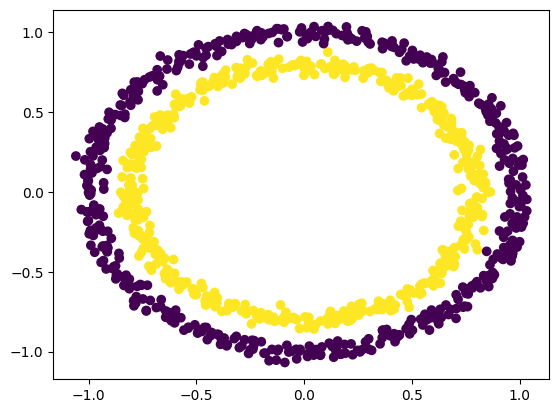

In [66]:
##plotting the data
plt.scatter(df["x1"],df["x2"],c=df["label"])

### CHECKING INPUT AND OUTPUT SHAPES AND CONVERTING FEATURES AND LABELS INTO TENSORS

In [67]:
print("The input shape is : ",x.shape)
print("The output shape is : ",y.shape)

The input shape is :  (1000, 2)
The output shape is :  (1000,)


In [68]:
#viewing the first sample of features and labels
print("values of features first sample is  \n",x[0])
print("values of labels first sample is \n",y[0])

print("shape of features first sample is ",x[0].shape)
print("shape of labels first sample is ",y[0].shape)

values of features first sample is  
 [0.75424625 0.23148074]
values of labels first sample is 
 1
shape of features first sample is  (2,)
shape of labels first sample is  ()


In [69]:
#converting the data into tensors
print("Before conversion ")

print("Datatype of features ",type(x))
print("Datatype of labels ",type(y))


#converting into tensors
x=torch.from_numpy(x).type(torch.float)
y=torch.from_numpy(y).type(torch.float)

print("After conversion")

print("Datatype of features ",type(x))
print("Datatype of labels ",type(y))


Before conversion 
Datatype of features  <class 'numpy.ndarray'>
Datatype of labels  <class 'numpy.ndarray'>
After conversion
Datatype of features  <class 'torch.Tensor'>
Datatype of labels  <class 'torch.Tensor'>


### SPLITTING THE DATA INTO TRAIN AND TEST

In [70]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

x_train.shape,x_test.shape,y_train.shape,y_test.shape

(torch.Size([800, 2]),
 torch.Size([200, 2]),
 torch.Size([800]),
 torch.Size([200]))

### BUILDING THE MODEL

In [71]:
## setting up the device agnostic code
device="cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

In [72]:
from torch import nn

##constructing a model that subclasses nn module
class CircleModel(nn.Module):
  def __init__(self):
    super().__init__()
    # create 2 nn.Linear layers capable of handling the shapes of our data
    self.layer_1=nn.Linear(in_features=2,out_features=10)#taking 2 inputs and giving 10 outputs
    self.layer_2=nn.Linear(in_features=10,out_features=1)#taking 10 inputs and 1 giving 1 output

  ##defining a forward function
  def forward(self,x):
    return self.layer_2(self.layer_1(x))



##Instantitaing the instance of our CircleModel class and sending it to the target device
model_0=CircleModel().to(device)
model_0

CircleModel(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=1, bias=True)
)

In [73]:
### another way of creating the model with nn.Sequential module
model_0=nn.Sequential(
    nn.Linear(in_features=2,out_features=10),
    nn.Linear(in_features=10,out_features=1)).to(device)
model_0

Sequential(
  (0): Linear(in_features=2, out_features=10, bias=True)
  (1): Linear(in_features=10, out_features=1, bias=True)
)

In [74]:
# ### we can incorporate above in nn.Module subclass code also
# ##constructing a model that subclasses nn module
# class CircleModel(nn.Module):
#   def __init__(self):
#     super().__init__()
#     self.two_linear_layers=nn.Sequential(
#         nn.Linear(in_features=2,out_features=10),
#         nn.Linear(in_features=10,out_features=1))
#   ##defining a forward function
#   def forward(self,x):
#     return self.two_linear_layers(x)



# ##Instantitaing the instance of our CircleModel class and sending it to the target device
# model_0=CircleModel().to(device)
# model_0

In [75]:
model_0.state_dict()

OrderedDict([('0.weight',
              tensor([[-0.1918,  0.2976],
                      [ 0.6313,  0.4087],
                      [-0.3091,  0.4082],
                      [ 0.1265,  0.3591],
                      [-0.4310, -0.7000],
                      [-0.2732, -0.5424],
                      [ 0.5802,  0.2037],
                      [ 0.2929,  0.2236],
                      [-0.0123,  0.5534],
                      [-0.5024,  0.0445]])),
             ('0.bias',
              tensor([-0.4826,  0.2180, -0.2435,  0.2167, -0.1473,  0.5865, -0.4191, -0.4217,
                      -0.4217,  0.6360])),
             ('1.weight',
              tensor([[ 0.1054,  0.3043, -0.2610, -0.3137, -0.2474, -0.2127,  0.1281,  0.1132,
                        0.2628, -0.1633]])),
             ('1.bias', tensor([-0.2156]))])

In [76]:
with torch.inference_mode():
  untrained_preds=model_0(x_test.to(device))
print("original predictions shape : ",y_test.shape)
print("untrained models prediction shape : ",untrained_preds.shape)
print("original predictions \n : ",y_test[:10])
print("untrained models prediction \n : ",untrained_preds[:10])

original predictions shape :  torch.Size([200])
untrained models prediction shape :  torch.Size([200, 1])
original predictions 
 :  tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.])
untrained models prediction 
 :  tensor([[-0.5374],
        [-0.2021],
        [-1.1357],
        [-0.3690],
        [-0.6904],
        [-0.4892],
        [ 0.1019],
        [ 0.0358],
        [-1.1536],
        [-0.1747]])


In [77]:
## setting up the loss function
#loss_fn=nn.BCELoss() #BCELoss=requires inputs to have gone through sigmoid activation function
loss_fn=nn.BCEWithLogitsLoss()## BCEWithLogitloss =sigmoid activation function builtin
##BCEWithlogitLoss is more numerically stable

##setting optimizer
optimizer=torch.optim.SGD(params=model_0.parameters(),lr=0.01)


In [78]:
##calculating accuracy
def accuracy_fn(y_true,y_pred):
  correct=torch.eq(y_true,y_pred).sum().item()
  acc=(correct/len(y_pred))*100
  return acc



### Steps in training

PyTorch training loop steps
- Forward pass - The model goes through all of the training data once, performing its forward() function calculations (model(x_train)).
- Calculate the loss - The model's outputs (predictions) are compared to the ground truth and evaluated to see how wrong they are (loss = loss_fn(y_pred, y_train).
- Zero gradients - The optimizers gradients are set to zero (they are accumulated by default) so they can be recalculated for the specific training step (optimizer.zero_grad()).
- Perform backpropagation on the loss - Computes the gradient of the loss with respect for every model parameter to be updated (each parameter with requires_grad=True). This is known as backpropagation, hence "backwards" (loss.backward()).
- Step the optimizer (gradient descent) - Update the parameters with requires_grad=True with respect to the loss gradients in order to improve them (optimizer.step()).

In [79]:
# View the frist 5 outputs of the forward pass on the test data
y_logits = model_0(x_test.to(device))[:5]
y_logits

tensor([[-0.5374],
        [-0.2021],
        [-1.1357],
        [-0.3690],
        [-0.6904]], grad_fn=<SliceBackward0>)

the raw outputs of our model are often referred to as logits.

That's what our model is outputing above when it takes in the input data (
 in the equation or X_test in the code), logits.

However, these numbers are hard to interpret.
To get our model's raw outputs (logits) into such a form, we can use the sigmoid activation function.

In [80]:
# Use sigmoid on model logits
y_pred_probs = torch.sigmoid(y_logits)
y_pred_probs

tensor([[0.3688],
        [0.4496],
        [0.2431],
        [0.4088],
        [0.3339]], grad_fn=<SigmoidBackward0>)

To turn our prediction probabilities in prediction labels, we can round the outputs of the sigmoid activation function since we are dealing with binary classification problem   
In the case of multiclass classification problem we use argmax on probabilities

In [81]:
# Find the predicted labels (round the prediction probabilities)
y_preds = torch.round(y_pred_probs)

# In full
y_pred_labels = torch.round(torch.sigmoid(model_0(x_test.to(device))[:5]))

# Check for equality
print(torch.eq(y_preds.squeeze(), y_pred_labels.squeeze()))

# Get rid of extra dimension
y_preds.squeeze()

tensor([True, True, True, True, True])


tensor([0., 0., 0., 0., 0.], grad_fn=<SqueezeBackward0>)

In [82]:

torch.manual_seed(42)

##set the number of epochs
epochs=100

##put the data to target device
x_train,y_train=x_train.to(device),y_train.to(device)
x_test,y_test=x_test.to(device),y_test.to(device)

##building the training and evaluation loop

for epoch in range(epochs):
  ##Training
  model_0.train()

  ##forward pass
  y_logits=model_0(x_train).squeeze()
  y_pred=torch.round(torch.sigmoid(y_logits))#turn logits===>probabilitie===>predicted labels

  ##calculate the loss/accuracy
  loss=loss_fn(y_logits,y_train)#since we have used BCEWithLogitLoss it requires logits as input
  #loss=loss_fn(torch.sigmoid(y_logits),y_train)#==BCELoss expects prediction probabilities as input

  acc=accuracy_fn(y_true=y_train,y_pred=y_pred)

  ##optimizer zero grad
  optimizer.zero_grad()

  ##loss backwards===> backward propogation
  loss.backward()

  ##optimizer step
  optimizer.step()

  #####Testing==========
  model_0.eval()
  with torch.inference_mode():
    ##forward pass
    test_logits=model_0(x_test).squeeze()
    test_pred=torch.round(torch.sigmoid(test_logits))


    ##calculate test loss and accuracy
    test_loss=loss_fn(test_logits,y_test)
    test_acc=accuracy_fn(y_test,test_pred)

  ##printing training and test scores over epochs
  if epoch%10==0:
    print(f'Epoch {epoch} | losss :{loss:.5f} | accuracy :{acc:.5f} | Test loss {test_loss:.5f} | Test accuracy {test_acc:.5f}')





Epoch 0 | losss :0.75877 | accuracy :42.25000 | Test loss 0.77223 | Test accuracy 40.00000
Epoch 10 | losss :0.75054 | accuracy :41.50000 | Test loss 0.76387 | Test accuracy 39.50000
Epoch 20 | losss :0.74341 | accuracy :42.00000 | Test loss 0.75657 | Test accuracy 40.00000
Epoch 30 | losss :0.73724 | accuracy :44.00000 | Test loss 0.75019 | Test accuracy 42.00000
Epoch 40 | losss :0.73188 | accuracy :45.25000 | Test loss 0.74462 | Test accuracy 43.00000
Epoch 50 | losss :0.72724 | accuracy :46.25000 | Test loss 0.73973 | Test accuracy 45.50000
Epoch 60 | losss :0.72321 | accuracy :46.00000 | Test loss 0.73545 | Test accuracy 47.00000
Epoch 70 | losss :0.71972 | accuracy :45.37500 | Test loss 0.73170 | Test accuracy 47.00000
Epoch 80 | losss :0.71668 | accuracy :46.25000 | Test loss 0.72840 | Test accuracy 48.50000
Epoch 90 | losss :0.71404 | accuracy :46.37500 | Test loss 0.72549 | Test accuracy 49.00000


From the above scores it seems that the model is not at all learning ,the accuracy is going down so we will try to visualize the decisison boundary for both train and test set   


In [84]:
import numpy as np
def plot_decision_boundary(model: torch.nn.Module, X: torch.Tensor, y: torch.Tensor):
    """Plots decision boundaries of model predicting on X in comparison to y.

    Source - https://madewithml.com/courses/foundations/neural-networks/ (with modifications)
    """
    # Put everything to CPU (works better with NumPy + Matplotlib)
    model.to("cpu")
    X, y = X.to("cpu"), y.to("cpu")

    # Setup prediction boundaries and grid
    x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
    y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 101), np.linspace(y_min, y_max, 101))

    # Make features
    X_to_pred_on = torch.from_numpy(np.column_stack((xx.ravel(), yy.ravel()))).float()

    # Make predictions
    model.eval()
    with torch.inference_mode():
        y_logits = model(X_to_pred_on)

    # Test for multi-class or binary and adjust logits to prediction labels
    if len(torch.unique(y)) > 2:
        y_pred = torch.softmax(y_logits, dim=1).argmax(dim=1)  # mutli-class
    else:
        y_pred = torch.round(torch.sigmoid(y_logits))  # binary

    # Reshape preds and plot
    y_pred = y_pred.reshape(xx.shape).detach().numpy()
    plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())


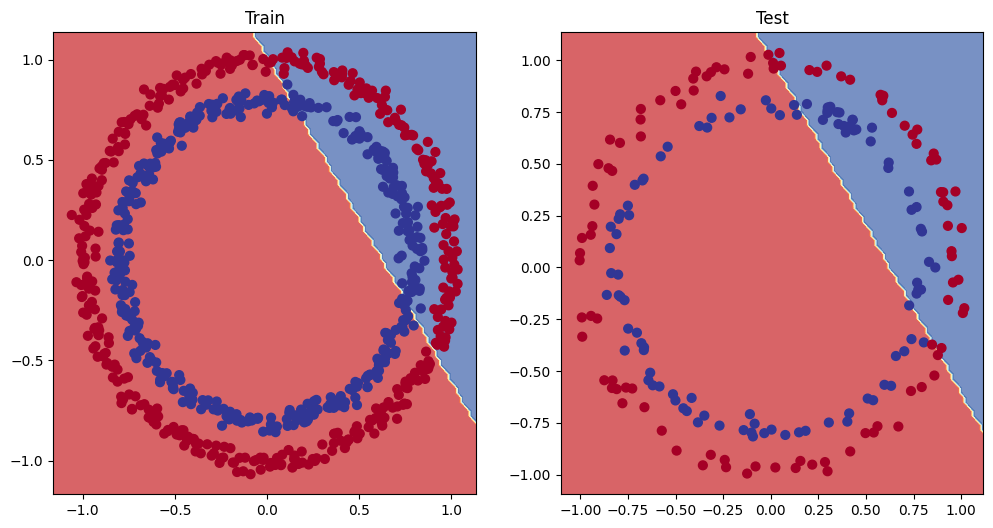

In [85]:
# Plotting decision boundaries for training and test sets
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_0, x_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_0, x_test, y_test)

### TECHNIQUES TO IMPROVE THE MODEL

- Adding more number of layers
- Adding more hidden units
- training for more number of epochs
- changing the activation function
- changing the loss function
- changing the learning rate
- changing the optimizer
- using transfer learning



In [86]:

class CircleModel1(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer_1 = nn.Linear(in_features=2, out_features=10)
        self.layer_2 = nn.Linear(in_features=10, out_features=20) # extra layer
        self.layer_3 = nn.Linear(in_features=20, out_features=1)

    def forward(self, x): # note: always make sure forward is spelt correctly!
        # Creating a model like this is the same as below, though below
        # generally benefits from speedups where possible.
        # z = self.layer_1(x)
        # z = self.layer_2(z)
        # z = self.layer_3(z)
        # return z
        return self.layer_3(self.layer_2(self.layer_1(x)))

model_1 = CircleModel1().to(device)
model_1

CircleModel1(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=20, bias=True)
  (layer_3): Linear(in_features=20, out_features=1, bias=True)
)

In [87]:
# loss_fn = nn.BCELoss() # Requires sigmoid on input
loss_fn = nn.BCEWithLogitsLoss() # Does not require sigmoid on input
optimizer = torch.optim.SGD(model_1.parameters(), lr=0.1)

In [88]:
torch.manual_seed(42)

epochs = 1000 # Training for longer

# Put data to target device
x_train, y_train = x_train.to(device), y_train.to(device)
x_test, y_test = x_test.to(device), y_test.to(device)

for epoch in range(epochs):
    ### Training
    # 1. Forward pass
    y_logits = model_1(x_train).squeeze()
    y_pred = torch.round(torch.sigmoid(y_logits)) # logits -> predicition probabilities -> prediction labels

    # 2. Calculate loss/accuracy
    loss = loss_fn(y_logits, y_train)
    acc = accuracy_fn(y_true=y_train,
                      y_pred=y_pred)

    # 3. Optimizer zero grad
    optimizer.zero_grad()

    # 4. Loss backwards
    loss.backward()

    # 5. Optimizer step
    optimizer.step()

    ### Test
    model_1.eval()
    with torch.inference_mode():
        # 1. Forward pass
        test_logits = model_1(x_test).squeeze()
        test_pred = torch.round(torch.sigmoid(test_logits))
        # 2. Caculating loss/accuracy
        test_loss = loss_fn(test_logits,
                            y_test)
        test_acc = accuracy_fn(y_true=y_test,
                               y_pred=test_pred)

    # Print out what's happening every 100 epochs
    if epoch % 100 == 0:
        print(f'Epoch {epoch} | losss :{loss:.5f} | accuracy :{acc:.5f} | Test loss {test_loss:.5f} | Test accuracy {test_acc:.5f}')

Epoch 0 | losss :0.69460 | accuracy :51.62500 | Test loss 0.69721 | Test accuracy 49.50000
Epoch 100 | losss :0.69301 | accuracy :50.75000 | Test loss 0.69526 | Test accuracy 47.00000
Epoch 200 | losss :0.69298 | accuracy :51.37500 | Test loss 0.69486 | Test accuracy 46.00000
Epoch 300 | losss :0.69298 | accuracy :51.37500 | Test loss 0.69474 | Test accuracy 45.00000
Epoch 400 | losss :0.69298 | accuracy :51.12500 | Test loss 0.69470 | Test accuracy 45.50000
Epoch 500 | losss :0.69298 | accuracy :51.12500 | Test loss 0.69468 | Test accuracy 46.00000
Epoch 600 | losss :0.69298 | accuracy :51.00000 | Test loss 0.69468 | Test accuracy 46.00000
Epoch 700 | losss :0.69298 | accuracy :51.00000 | Test loss 0.69468 | Test accuracy 46.00000
Epoch 800 | losss :0.69298 | accuracy :51.00000 | Test loss 0.69468 | Test accuracy 46.00000
Epoch 900 | losss :0.69298 | accuracy :51.00000 | Test loss 0.69468 | Test accuracy 46.00000


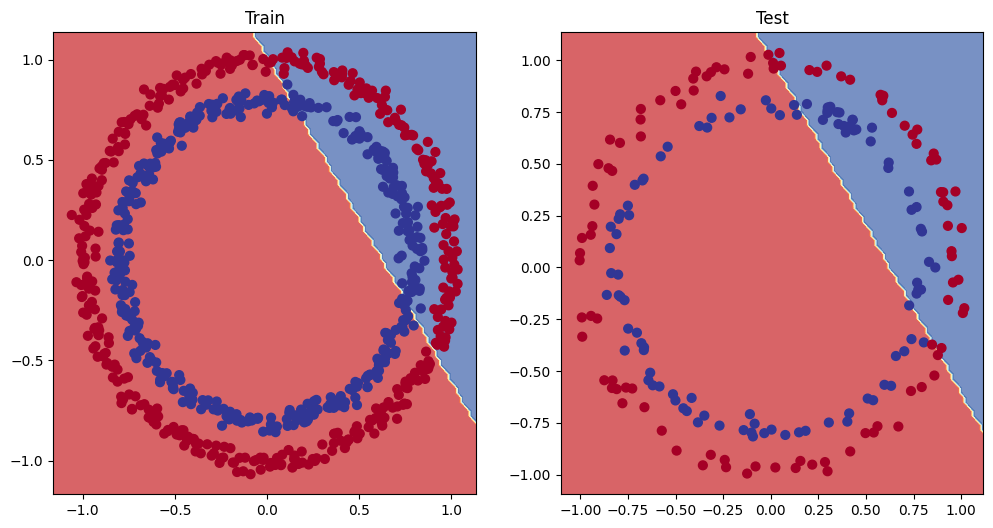

In [89]:
# Plotting decision boundaries for training and test sets
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_0, x_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_0, x_test, y_test)

### PREPARING DATA TO SEE IF OUR MODEL CAN FIT STRAIGHT LINE

In [90]:
# Creating  data
weight = 0.7
bias = 0.3
start = 0
end = 1
step = 0.01


x_regression = torch.arange(start, end, step).unsqueeze(dim=1)
y_regression = weight * x_regression + bias # linear regression formula

# Checking  the data
print(len(x_regression))
x_regression[:5], y_regression[:5]

100


(tensor([[0.0000],
         [0.0100],
         [0.0200],
         [0.0300],
         [0.0400]]),
 tensor([[0.3000],
         [0.3070],
         [0.3140],
         [0.3210],
         [0.3280]]))

In [91]:
# Creating train and test splits
train_split = int(0.8 * len(x_regression)) # 80% of data used for training set
x_train_regression, y_train_regression = x_regression[:train_split], y_regression[:train_split]
x_test_regression, y_test_regression = x_regression[train_split:], y_regression[train_split:]

# Checking the lengths of each split
print(len(x_train_regression),
    len(y_train_regression),
    len(x_test_regression),
    len(y_test_regression))

80 80 20 20


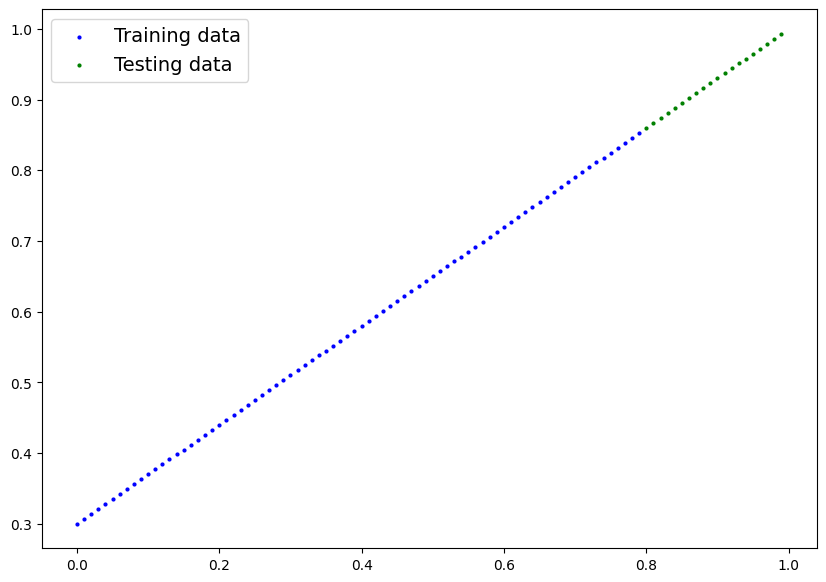

In [92]:
plot_predictions(train_data=x_train_regression,
    train_labels=y_train_regression,
    test_data=x_test_regression,
    test_labels=y_test_regression)

In [93]:
# Same architecture as model_1 (but using nn.Sequential)
model_2 = nn.Sequential(
    nn.Linear(in_features=1, out_features=10),
    nn.Linear(in_features=10, out_features=20),
    nn.Linear(in_features=20, out_features=1)
).to(device)

model_2

Sequential(
  (0): Linear(in_features=1, out_features=10, bias=True)
  (1): Linear(in_features=10, out_features=20, bias=True)
  (2): Linear(in_features=20, out_features=1, bias=True)
)

In [94]:
# Loss and optimizer
loss_fn = nn.L1Loss()
optimizer = torch.optim.SGD(model_2.parameters(), lr=0.1)

In [95]:
# Training the model
torch.manual_seed(42)

# Setting the number of epochs
epochs = 1000

# Putting  data to target device
x_train_regression, y_train_regression = x_train_regression.to(device), y_train_regression.to(device)
x_test_regression, y_test_regression = x_test_regression.to(device), y_test_regression.to(device)

for epoch in range(epochs):
    ### Training
    # 1. Forward pass
    y_pred = model_2(x_train_regression)

    # 2. Calculate loss (no accuracy since it's a regression problem, not classification)
    loss = loss_fn(y_pred, y_train_regression)

    # 3. Optimizer zero grad
    optimizer.zero_grad()

    # 4. Loss backwards
    loss.backward()

    # 5. Optimizer step
    optimizer.step()

    ### Testing
    model_2.eval()
    with torch.inference_mode():
      # 1. Forward pass
      test_pred = model_2(x_test_regression)
      # 2. Calculate the loss
      test_loss = loss_fn(test_pred, y_test_regression)


    if epoch % 100 == 0:
        print(f"Epoch: {epoch} | Train loss: {loss:.5f}, Test loss: {test_loss:.5f}")

Epoch: 0 | Train loss: 0.60134, Test loss: 0.36239
Epoch: 100 | Train loss: 0.05643, Test loss: 0.20888
Epoch: 200 | Train loss: 0.05502, Test loss: 0.16525
Epoch: 300 | Train loss: 0.05384, Test loss: 0.14109
Epoch: 400 | Train loss: 0.05216, Test loss: 0.11602
Epoch: 500 | Train loss: 0.05658, Test loss: 0.13237
Epoch: 600 | Train loss: 0.05567, Test loss: 0.12835
Epoch: 700 | Train loss: 0.04689, Test loss: 0.13357
Epoch: 800 | Train loss: 0.05530, Test loss: 0.12710
Epoch: 900 | Train loss: 0.05536, Test loss: 0.12130


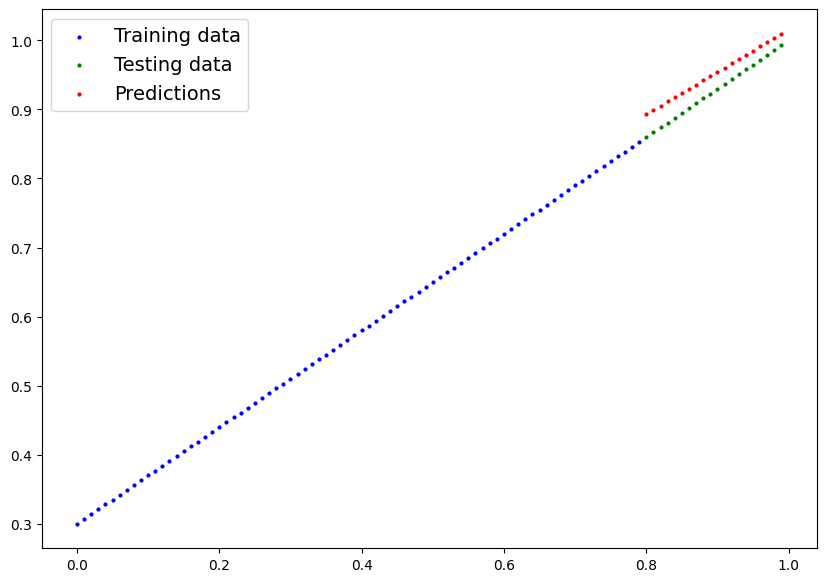

In [96]:


# Plot data and predictions with data on the CPU (matplotlib can't handle data on the GPU)

plot_predictions(train_data=x_train_regression.cpu(),
                 train_labels=y_train_regression.cpu(),
                 test_data=x_test_regression.cpu(),
                 test_labels=y_test_regression.cpu(),
                 predictions=test_pred.cpu())

#### RECREATING THE MODEL BY ADDING NON LINEAR FUNCTIONS



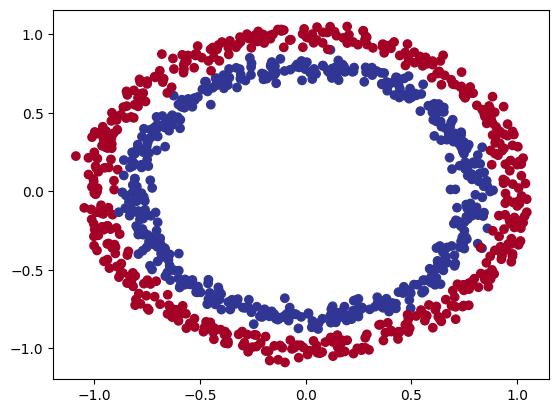

In [97]:
### recreating the data red and blue circles
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles

n_samples=1000

x,y=make_circles(n_samples=n_samples,noise=0.04,random_state=42)

plt.scatter(x[:,0],x[:,1],c=y,cmap=plt.cm.RdYlBu)


In [98]:
##convert data to tensors and then to train test split
import torch
from sklearn.model_selection import train_test_split

x=torch.from_numpy(x).type(torch.float)
y=torch.from_numpy(y).type(torch.float)

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=42)

x_train.shape,y_train.shape,x_test.shape,y_test.shape

(torch.Size([800, 2]),
 torch.Size([800]),
 torch.Size([200, 2]),
 torch.Size([200]))

### Building a model with non-linearity
Linear = straight lines  
Non-linear = non-straight lines  
Artificial neural networks are a large combination of linear (straight) and non-straight (non-linear) functions which are potentially able to find patterns in data.



In [99]:
##Building a model with non linear activation functions
from torch import nn

class CircleModel2(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer_1=nn.Linear(in_features=2,out_features=10)
    self.layer_2=nn.Linear(in_features=10,out_features=10)
    self.layer_3=nn.Linear(in_features=10,out_features=1)
    self.relu=nn.ReLU()

  def forward(self,x):
    return self.layer_3(self.relu(self.layer_2(self.relu(self.layer_1(x)))))

##creating the instance i.e model
model_3=CircleModel2().to(device)
model_3

CircleModel2(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
  (relu): ReLU()
)

In [100]:
##setting up loss and optimizer
loss_fn=nn.BCEWithLogitsLoss()
optimizer=torch.optim.SGD(model_3.parameters(),lr=0.1)

### Training a model with non linearity

In [101]:
##setting the random seed
torch.manual_seed(42)
torch.cuda.manual_seed(42)

##putting the tensors on the target device
x_train=x_train.to(device)
y_train=y_train.to(device)
x_test=x_test.to(device)
y_test=y_test.to(device)


##setting the number of epochs for which we want ot train
n_epochs=1000

##starting the training loop
for epoch in range(n_epochs):

  ##training
  model_3.train()

  ##forward pass
  y_logits=model_3(x_train).squeeze()
  y_pred=torch.round(torch.sigmoid(y_logits))  # logits -> prediction probabilities -> prediction labels

  ##calculate the loss
  loss=loss_fn(y_logits,y_train) # BCEWithLogitsLoss (takes in logits as first input)
  accuracy=accuracy_fn(y_train,y_pred)

  ###optimizer--zero gradient
  optimizer.zero_grad()

  ##loss backward
  loss.backward()

  ##stepping the optimizer()
  optimizer.step()

  ##Evaluating or testing the model
  model_3.eval()
  with torch.inference_mode():
    test_logits=model_3(x_test).squeeze()
    test_pred=torch.round(torch.sigmoid(test_logits))

    test_loss=loss_fn(test_logits,y_test)
    test_accuracy=accuracy_fn(y_test,test_pred)


    ###visualizing the training and evaluation process
    if epoch % 100 == 0:
      print(f"Epoch: {epoch}  Train Loss:{loss:.4f}  Train_Accuracy;{accuracy:.4f} Test Loss : {test_loss:.4f} Test Accuracy:{test_accuracy:.4f}")




Epoch: 0  Train Loss:0.6929  Train_Accuracy;50.0000 Test Loss : 0.6932 Test Accuracy:50.0000
Epoch: 100  Train Loss:0.6912  Train_Accuracy;52.6250 Test Loss : 0.6911 Test Accuracy:53.0000
Epoch: 200  Train Loss:0.6898  Train_Accuracy;53.3750 Test Loss : 0.6896 Test Accuracy:54.5000
Epoch: 300  Train Loss:0.6879  Train_Accuracy;53.1250 Test Loss : 0.6875 Test Accuracy:55.0000
Epoch: 400  Train Loss:0.6852  Train_Accuracy;52.8750 Test Loss : 0.6845 Test Accuracy:55.5000
Epoch: 500  Train Loss:0.6810  Train_Accuracy;53.1250 Test Loss : 0.6801 Test Accuracy:56.5000
Epoch: 600  Train Loss:0.6752  Train_Accuracy;54.2500 Test Loss : 0.6738 Test Accuracy:56.5000
Epoch: 700  Train Loss:0.6667  Train_Accuracy;58.5000 Test Loss : 0.6648 Test Accuracy:59.0000
Epoch: 800  Train Loss:0.6517  Train_Accuracy;64.8750 Test Loss : 0.6498 Test Accuracy:69.0000
Epoch: 900  Train Loss:0.6240  Train_Accuracy;74.1250 Test Loss : 0.6247 Test Accuracy:78.0000


### Evaluating the model trained with non linear activation function

In [102]:
model_3.eval()
with torch.inference_mode():
  y_preds=torch.round(torch.sigmoid(model_3(x_test))).squeeze()

y_test[:10],y_preds[:10]

(tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.]),
 tensor([1., 0., 1., 0., 0., 0., 0., 0., 1., 0.]))

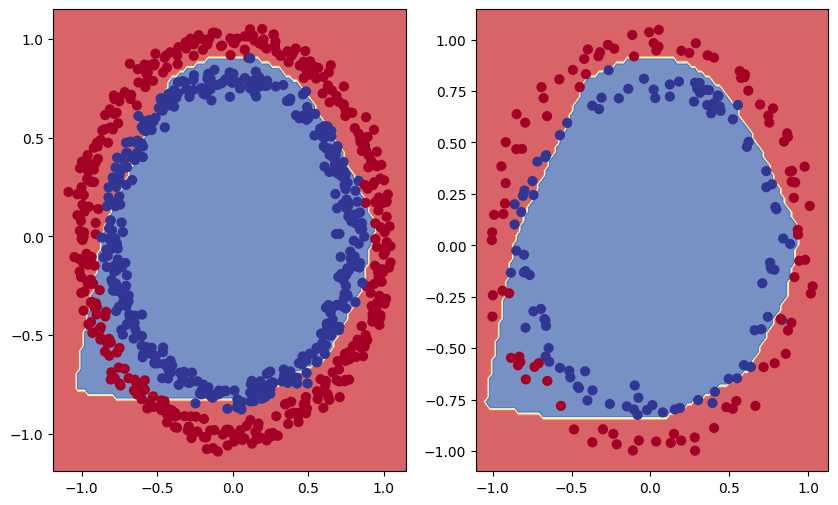

In [103]:
###plotting decision boundaries

plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
plot_decision_boundary(model_3,x_train,y_train)

plt.subplot(1,2,2)
plot_decision_boundary(model_3,x_test,y_test)


### Replicating non linear activation functions

Neural networks, rather than us telling the model what to learn, we give it the tools to discover patterns in data and it tries to figure out the patterns on its own.   

In [104]:
#creating a tensor
tensor_a=torch.arange(-10,10,1,dtype=torch.float32)
tensor_a

tensor([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,   1.,
          2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.])

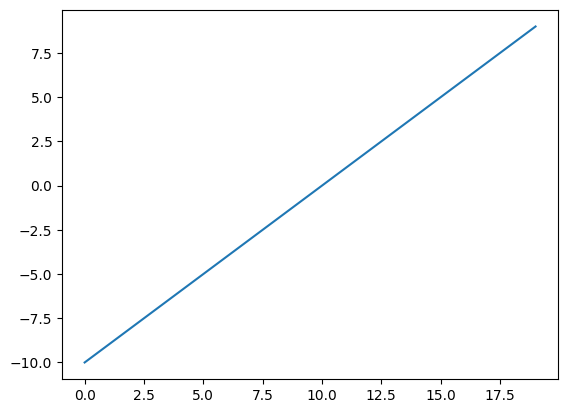

In [105]:
##plotting tensor_a
plt.plot(tensor_a)

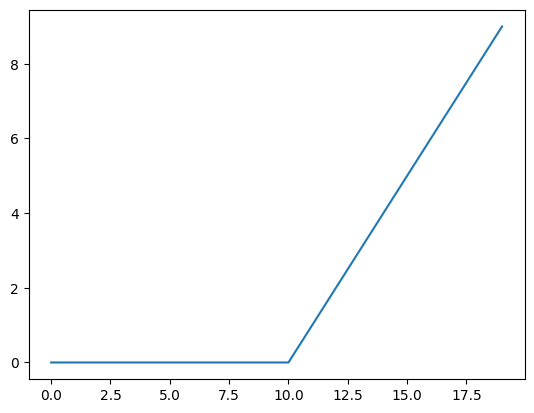

In [106]:
##RELU===>  max(0,x)
##plotting relu on tensorr a
plt.plot(torch.relu(tensor_a))

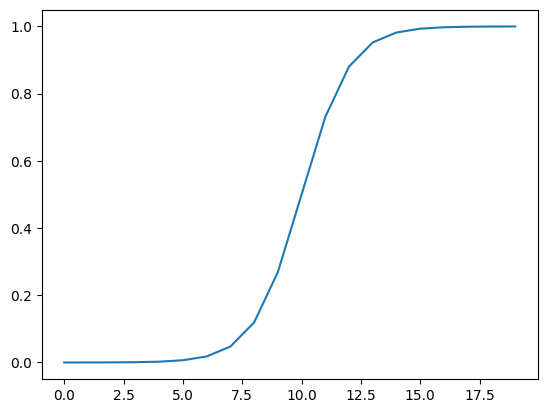

In [107]:
#SIGMOID===>1/(1+E^-X)
##plotting sigmoid

plt.plot(1/(1+torch.exp(-(tensor_a))))

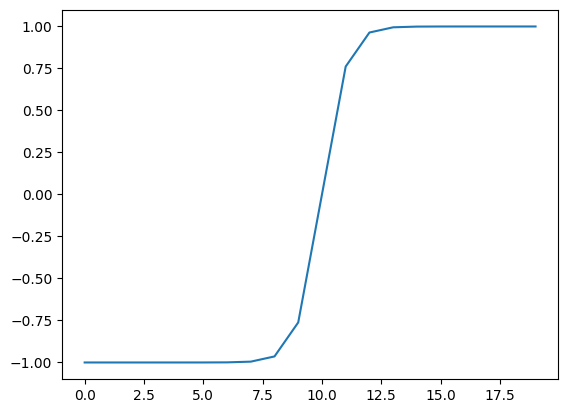

In [108]:
##tanh==========>(e^x - e^-x)/(e^x + e^-x)
##plotting the tanh i.e hyperbolic tangent actvation function

tanh_a=(torch.exp(tensor_a)-torch.exp(-tensor_a))/(torch.exp(tensor_a)+torch.exp(-tensor_a))
plt.plot(tanh_a)

### MULTI CLASS CLASSIFICATION PROBLEM


### Creating a toy dataset

The shape of x_train and y_train is  torch.Size([800, 2]) torch.Size([800])
The shape of x_test and y_testis  torch.Size([200, 2]) torch.Size([200])


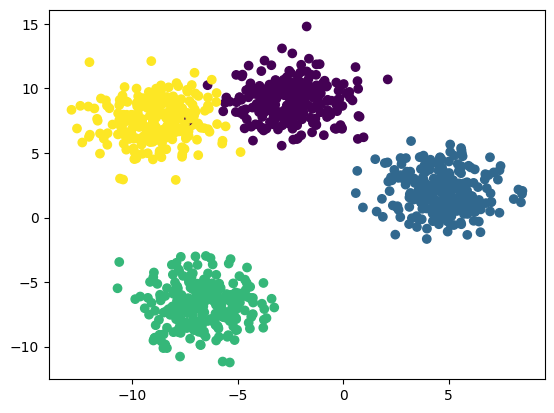

In [109]:
##importing required libraries
import torch
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split

## setting the parametrs for data creation
num_classes=4
num_features=2
random_state=42

x,y=make_blobs(n_samples=1000,n_features=num_features,centers=num_classes,cluster_std=1.5,random_state=42)


#Turning data into tensors
x=torch.from_numpy(x).type(torch.float32)
y=torch.from_numpy(y).type(torch.LongTensor)

##Splitting the data into train test
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

##printing the shape of train and test datasets
print("The shape of x_train and y_train is ",x_train.shape,y_train.shape)
print("The shape of x_test and y_testis ",x_test.shape,y_test.shape)

##Visualizing the data

plt.scatter(x[:,0],x[:,1],c=y)

### Building a Multi Class Clasification Model in PyTorch

In [110]:
##creating a device agnostic code
device="cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

In [111]:
from torch import nn
class BlobModel(nn.Module):
  def __init__(self,input_features,output_features,hidden_units):
    """Initializes the multi class classification Model
    ARGS:
    input_features=number of input features to the model
    output_features=number of classes to be predicted
    hidden_units=number of hidden units between layers"""
    super().__init__()
    self.stacked_layer=nn.Sequential(
        (nn.Linear(in_features=input_features,out_features=hidden_units)),
         (nn.ReLU()),
         (nn.Linear(in_features=hidden_units,out_features=hidden_units)),
        (nn.ReLU()),
        (nn.Linear(in_features=hidden_units,out_features=output_features)))

  def forward(self,x):
      return self.stacked_layer(x)

  ##creating the instance of Blob Model
model_4= BlobModel(input_features=2,output_features=4,hidden_units=10).to(device)
model_4

BlobModel(
  (stacked_layer): Sequential(
    (0): Linear(in_features=2, out_features=10, bias=True)
    (1): ReLU()
    (2): Linear(in_features=10, out_features=10, bias=True)
    (3): ReLU()
    (4): Linear(in_features=10, out_features=4, bias=True)
  )
)

### Creating a loss function and an optimizer for multi class classification model

In [112]:
loss_fn=nn.CrossEntropyLoss()#===>multiclass classsification model
optimizer=torch.optim.SGD(model_4.parameters(),lr=0.1)


### Creating a training loop and testing loop for a pytorch multiclass classification  model

In [113]:
##setting up the random seed
torch.manual_seed(42)
torch.cuda.manual_seed(42)

##putting the tensors on the device
x_train=x_train.to(device)
y_train-y_train.to(device)
x_test=x_test.to(device)
y_test=y_test.to(device)

##setting epochs
n_epochs=1000

##train
model_4.train()

##starting the training loop
for epoch in range(n_epochs):
  ##train
  model_4.train()

 ##forward pas
  y_logits=model_4(x_train)
  y_preds=torch.argmax(torch.softmax(y_logits,dim=1),dim=1)#==logits==>pred_probabilities==>predcitions

  ##calculate loss
  loss=loss_fn(y_logits,y_train)
  accuracy=accuracy_fn(y_train,y_preds)

  ##optimizer zero gradient
  optimizer.zero_grad()

  ##loss mackward
  loss.backward()

  ##stepping the optimizer
  optimizer.step()

  ##evaluation
  model_4.eval()
  with torch.inference_mode():
    test_logits=model_4(x_test).squeeze()
    test_preds=torch.argmax(torch.softmax(test_logits,dim=1),dim=1)
    test_loss=loss_fn(test_logits,y_test)
    test_accuracy=accuracy_fn(y_test,test_preds)

  ##printing the training and evaluation statistics
  if epoch %100==0:
    print(f"Train Loss:{loss:.4f} Train Accuracy{accuracy:.4f} Test loss:{test_loss:.4f} test_accuracy{test_accuracy:.4f}")

Train Loss:1.5087 Train Accuracy2.7500 Test loss:1.4117 test_accuracy1.5000
Train Loss:0.0381 Train Accuracy99.0000 Test loss:0.0293 test_accuracy99.5000
Train Loss:0.0293 Train Accuracy99.0000 Test loss:0.0193 test_accuracy99.5000
Train Loss:0.0274 Train Accuracy99.1250 Test loss:0.0168 test_accuracy99.5000
Train Loss:0.0265 Train Accuracy99.1250 Test loss:0.0156 test_accuracy99.5000
Train Loss:0.0259 Train Accuracy99.1250 Test loss:0.0148 test_accuracy99.5000
Train Loss:0.0254 Train Accuracy99.2500 Test loss:0.0143 test_accuracy99.5000
Train Loss:0.0250 Train Accuracy99.2500 Test loss:0.0138 test_accuracy99.5000
Train Loss:0.0246 Train Accuracy99.2500 Test loss:0.0134 test_accuracy99.5000
Train Loss:0.0243 Train Accuracy99.2500 Test loss:0.0131 test_accuracy99.5000


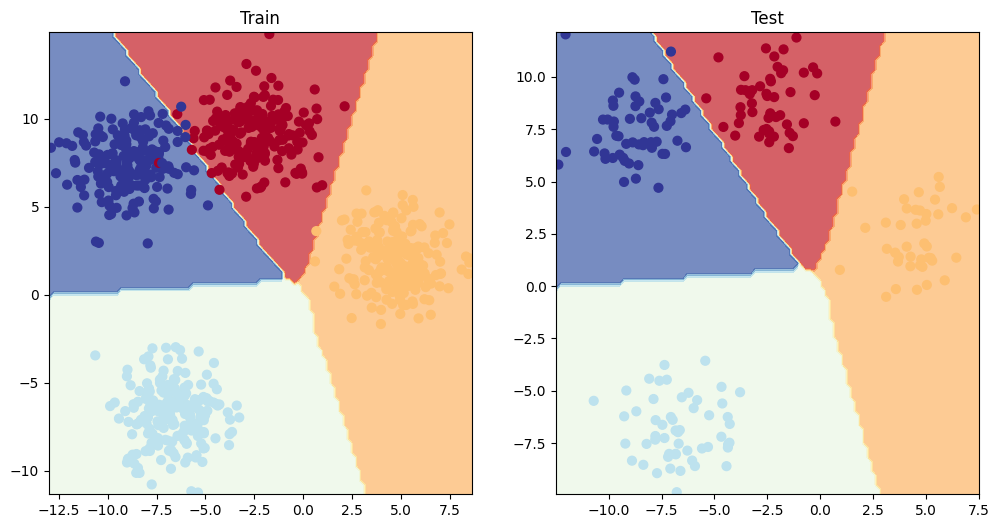

In [114]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_4, x_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_4, x_test, y_test)